### Customer Churn Analysis
1. data pre-processing
2. imbalanced dataset
3. model building
4. model evaluation 

In [2]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [200]:
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff 
from plotly.subplots import make_subplots
import plotly.offline as pyo
pyo.init_notebook_mode()
sns.set_style('darkgrid')
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split,cross_val_score


In [18]:
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score as f1
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix,accuracy_score


In [255]:
from sklearn.metrics import classification_report

In [19]:
from imblearn.over_sampling import SMOTE

In [27]:
import scikitplot as skplt
plt.rc('figure',figsize=(18,9))

## Data Loading

In [31]:
c_data= pd.read_csv('BankChurners.csv')
b_data= pd.read_csv('BankChurners.csv')


In [33]:
c_data= b_data[b_data.columns[:-2]]

## Exploratory Data analysis

In [35]:
c_data.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

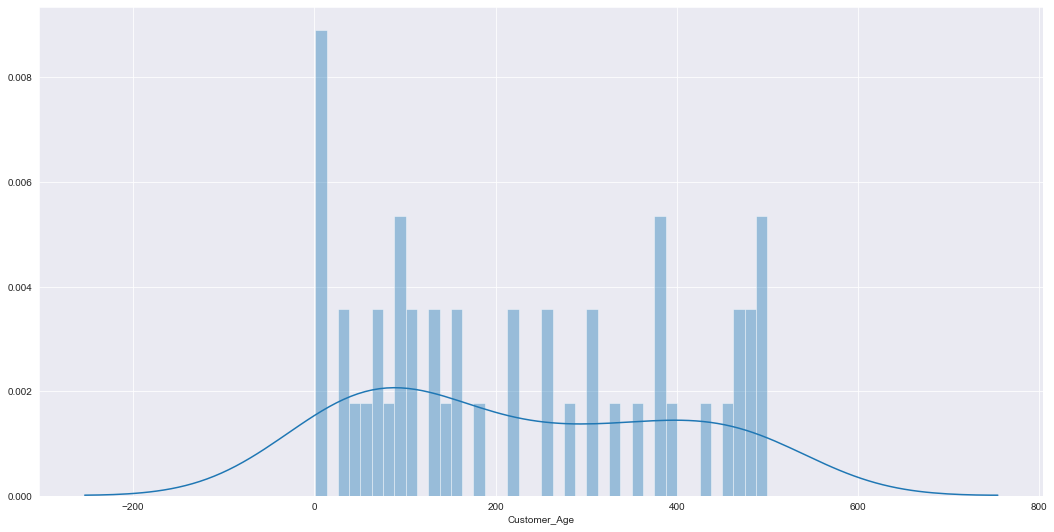

In [40]:
sns.distplot(c_data['Customer_Age'].value_counts(),bins=40)

#### subplot

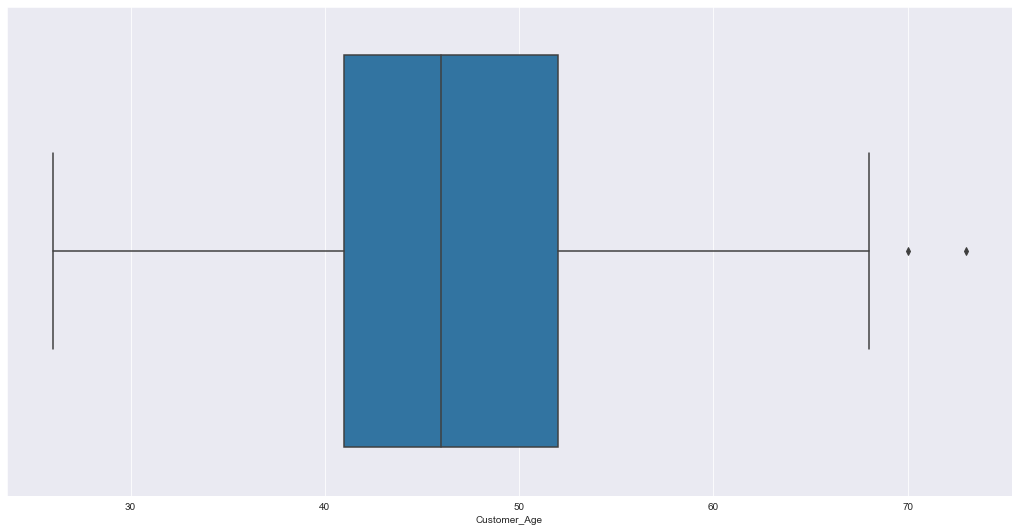

In [44]:
fig= make_subplots(rows=2,cols=1)
sns.boxplot(c_data['Customer_Age'])

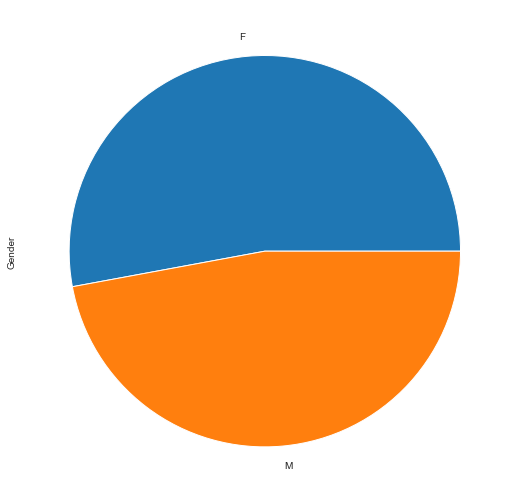

In [49]:
c_data['Gender'].value_counts().plot(kind='pie',)

0.40010012019986707

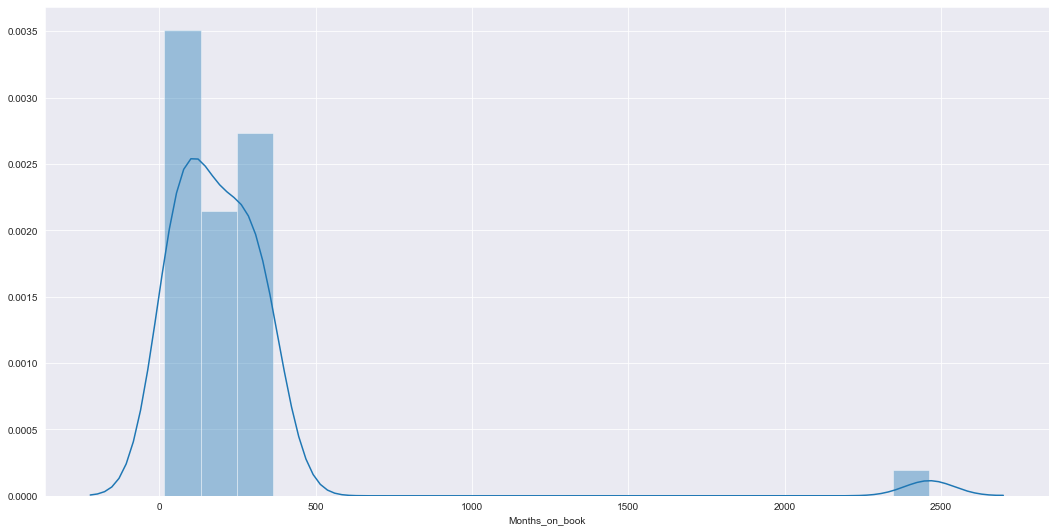

In [51]:
sns.distplot(c_data['Months_on_book'].value_counts())
c_data['Months_on_book'].kurt()

target= 'Attrition_Flag'

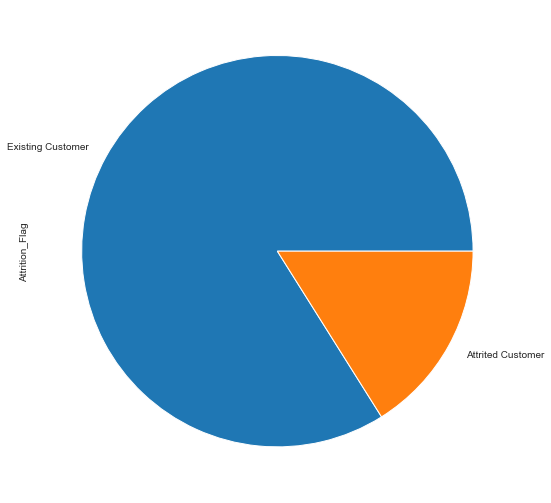

In [57]:
c_data['Attrition_Flag'].value_counts().plot(kind='pie')

#### imbalanced datasets

as we can see omly around 16& of the data sample represents churn customers: in the following steps , we need to handle the imbalanced dataset. to upsample the minor class. 

it will be useful for model tp catch the small details on both class. 

## 3) Data Preprocessing

In [58]:
c_data['Attrition_Flag'].value_counts()

Existing Customer    8500
Attrited Customer    1627
Name: Attrition_Flag, dtype: int64

In [60]:
c_data["Attrition_Flag"]= c_data["Attrition_Flag"].replace({'Attrited Customer':1,
                                 'Existing Customer':0})

In [61]:
c_data['Attrition_Flag'].value_counts()

0    8500
1    1627
Name: Attrition_Flag, dtype: int64

In [62]:
c_data['Gender'].value_counts()

F    5358
M    4769
Name: Gender, dtype: int64

In [64]:
c_data['Gender']= c_data['Gender'].replace({
    'F':1,
    'M':0
})

In [65]:
c_data['Gender'].value_counts()

1    5358
0    4769
Name: Gender, dtype: int64

In [78]:
c_data.dtypes

CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
College                       uint8
Doctorate                     uint8
Graduate                      uint8
High School                   uint8
Post-Graduate                 uint8
Uneducated                    uint8
dtype: object

#### column encoding

#### 1. encoding the 'Education_Level'

In [77]:
c_data= pd.concat([c_data, (pd.get_dummies(c_data['Education_Level']))],axis=1).drop(columns=['Unknown',
                                                                                     'Education_Level'])

#### 2. Marital Status Encoding

In [82]:
c_data= pd.concat([c_data,pd.get_dummies(c_data['Marital_Status'])],axis=1).drop(columns=['Unknown','Marital_Status'])

#### 3. Income Cateogory 

In [88]:
c_data= pd.concat([c_data,pd.get_dummies(c_data['Income_Category'])],axis=1).drop(columns=['Unknown',
                                                                                  'Income_Category'])

#### 4. Card Category 

In [92]:
c_data= pd.concat([c_data,pd.get_dummies(c_data['Card_Category'])],axis=1).drop(columns=['Platinum',
                                                                                'Card_Category'])

#### checking whether still a category variable left

In [97]:
c_data.dtypes


CLIENTNUM                     int64
Attrition_Flag                int64
Customer_Age                  int64
Gender                        int64
Dependent_count               int64
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
College                       uint8
Doctorate                     uint8
Graduate                      uint8
High School                   uint8
Post-Graduate                 uint8
Uneducated                    uint8
Divorced                      uint8
Married                       uint8
Single                        uint8
$120K +                       uint8
$40K - $60K                 

#### drop the Client Number

In [101]:
c_data= c_data.drop(columns=['CLIENTNUM'])

#### Correlation

a) spearman correlation 

<Figure size 1440x864 with 0 Axes>

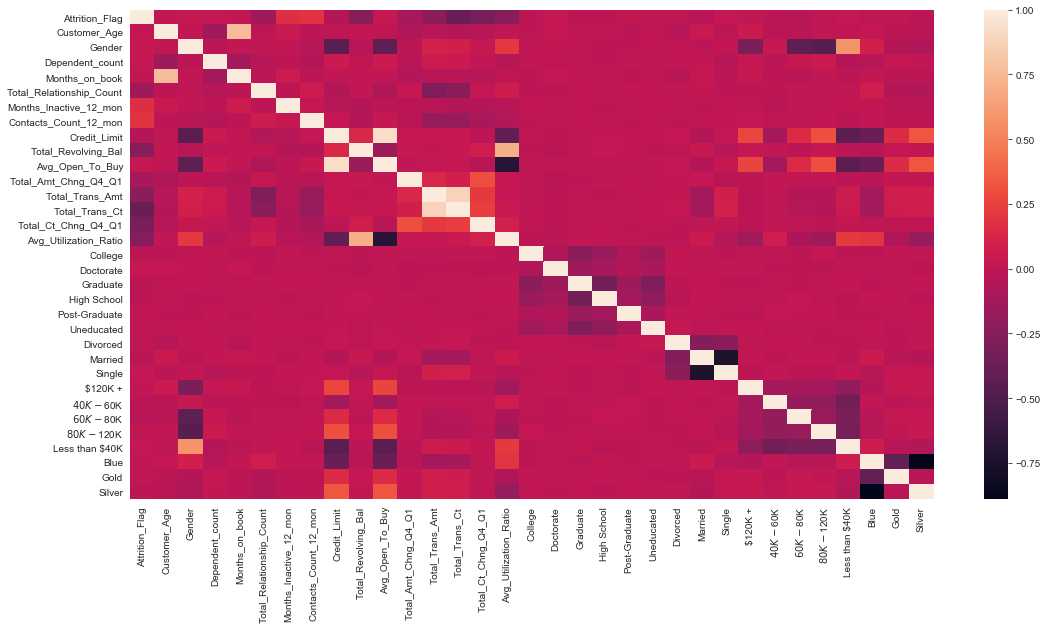

<Figure size 1440x864 with 0 Axes>

In [117]:
sns.heatmap(c_data.corr('spearman'),annot=False,)
plt.figure(figsize=(20, 12))
# plt.xlabel('ADA',fontsize=12)

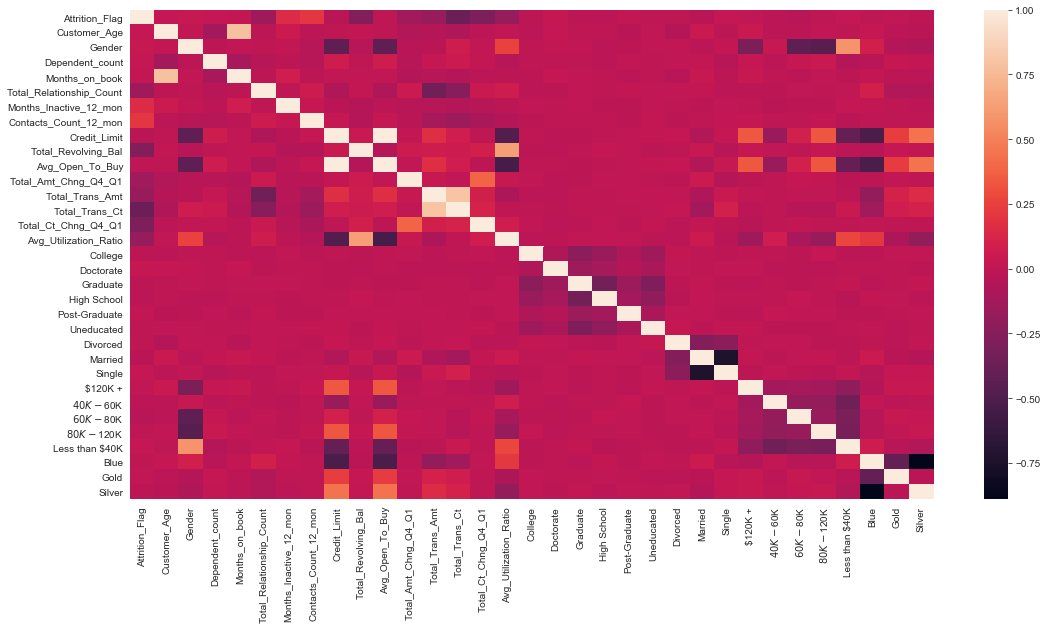

In [119]:
sns.heatmap(c_data.corr('pearson'))

### 4) Over Sampling using SMOTE

In [123]:
X= c_data.drop(columns=['Attrition_Flag'])
y= c_data['Attrition_Flag']

In [126]:
oversample = SMOTE()
X_smote,y_smote= oversample.fit_resample(X,y)

In [133]:
print(X.shape)
print(X_smote.shape)
print(y.shape)
print(y_smote.shape)

(10127, 32)
(17000, 32)
(10127,)
(17000,)


In [148]:
usampled_df = X.assign(Churn = y)

#### the ohe_data  =   One-Hot-Encoded Data
#### usample_df= undersample_df without One Hot Encoding

In [177]:
ohe_data =usampled_df[usampled_df.columns[15:-1]].copy()

usampled_df = usampled_df.drop(columns=usampled_df.columns[15:-1])

In [137]:
fig = make_subplots(rows=2, cols=1,shared_xaxes=True,subplot_titles=('Perason Correaltion',  'Spearman Correaltion'))
colorscale=     [[1.0              , "rgb(165,0,38)"],
                [0.8888888888888888, "rgb(215,48,39)"],
                [0.7777777777777778, "rgb(244,109,67)"],
                [0.6666666666666666, "rgb(253,174,97)"],
                [0.5555555555555556, "rgb(254,224,144)"],
                [0.4444444444444444, "rgb(224,243,248)"],
                [0.3333333333333333, "rgb(171,217,233)"],
                [0.2222222222222222, "rgb(116,173,209)"],
                [0.1111111111111111, "rgb(69,117,180)"],
                [0.0               , "rgb(49,54,149)"]]

s_val =usampled_df.corr('pearson')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,name='pearson',showscale=False,xgap=1,ygap=1,colorscale=colorscale),
    row=1, col=1
)


s_val =usampled_df.corr('spearman')
s_idx = s_val.index
s_col = s_val.columns
s_val = s_val.values
fig.add_trace(
    go.Heatmap(x=s_col,y=s_idx,z=s_val,xgap=1,ygap=1,colorscale=colorscale),
    row=2, col=1
)
fig.update_layout(
    hoverlabel=dict(
        bgcolor="white",
        font_size=16,
        font_family="Rockwell"
    )
)
fig.update_layout(height=700, width=900, title_text="Upsmapled Correlations")
fig.show()

## 5. PCA analysis of One-hot-Encoded Data

here there will be PCA for dimensionality Reduction and losing some variances.

but simultaneously, using coupld of PCA insted of tens of one-hot ENcoded feature will help to construct a better model

In [158]:
N_COMPONENTS= 4
pca_model = PCA(n_components=N_COMPONENTS)

In [160]:
pc_matrix= pca_model.fit_transform(ohe_data)

In [156]:
# usampled_df.drop(columns=usampled_df.columns[15:-1])

In [168]:
evr= pca_model.explained_variance_ratio_
print(evr)
print('the variance ratio',evr.sum()*100)

[0.20707719 0.1362115  0.12607298 0.08342215]
the variance ratio 55.2783824685226


plot the variance on plot

In [173]:

total = evr.sum()*100
cumsum= np.cumsum(evr)

In [174]:
trace1 = {
    "name": "individual explained variance", 
    "type": "bar", 
    'y':evr}
trace2 = {
    "name": "cumulative explained variance", 
    "type": "scatter", 
     'y':cumsum}
data = [trace1, trace2]
layout = {
    "xaxis": {"title": "Principal components"}, 
    "yaxis": {"title": "Explained variance ratio"},
  }
fig = go.Figure(data=data, layout=layout)
fig.update_layout(     title='Explained Variance Using {} Dimensions'.format(N_COMPONENTS))
fig.show()

### adding the PCA to the Usampled data

In [185]:
pcadf= pd.DataFrame(pc_matrix,columns=['PC-{}'.format(i) for i in range(0,N_COMPONENTS)])
usampled_df_with_pcs= pd.concat([usampled_df,pcadf],axis=1)
# pcadf

In [191]:
usampled_df_with_pcs

Customer_Age  Gender  Dependent_count  Months_on_book  \
0                45       0                3              39   
1                49       1                5              44   
2                51       0                3              36   
3                40       1                4              34   
4                40       0                3              21   
...             ...     ...              ...             ...   
10122            50       0                2              40   
10123            41       0                2              25   
10124            44       1                1              36   
10125            30       0                2              36   
10126            43       1                2              25   

       Total_Relationship_Count  Months_Inactive_12_mon  \
0                             5                       1   
1                             6                       1   
2                             4                       1   
3                             3                       4   
4                             5                       1   
...                         ...                     ...   
10122                         3                       2   
10123                         4                       2   
10124                         5                       3   
10125                         4                       3   
10126                         6                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
0                          3       12691.0                  777   
1                          2        8256.0                  864   
2                          0        3418.0                    0   
3                          1        3313.0                 2517   
4                          0        4716.0                    0   
...                      ...           ...                  ...   
10122                      3        4003.0                 1851   
10123                      3        4277.0                 2186   
10124                      4        5409.0                    0   
10125                      3        5281.0                    0   
10126                      4       10388.0                 1961   

       Avg_Open_To_Buy  Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  \
0              11914.0                 1.335             1144              42   
1               7392.0                 1.541             1291              33   
2               3418.0                 2.594             1887              20   
3                796.0                 1.405             1171              20   
4               4716.0                 2.175              816              28   
...                ...                   ...              ...             ...   
10122           2152.0                 0.703            15476             117   
10123           2091.0                 0.804             8764              69   
10124           5409.0                 0.819            10291              60   
10125           5281.0                 0.535             8395              62   
10126           8427.0                 0.703            10294              61   

       Total_Ct_Chng_Q4_Q1  Avg_Utilization_Ratio  Churn      PC-0      PC-1  \
0                    1.625                  0.061      0 -0.672478 -0.501284   
1                    3.714                  0.105      0  0.760635  0.844682   
2                    2.333                  0.000      0 -0.697175 -0.206848   
3                    2.333                  0.760      0  0.081683  0.525535   
4                    2.500                  0.000      0 -0.657038 -0.409517   
...                    ...                    ...    ...       ...       ...   
10122                0.857                  0.462      0  0.734538 -0.337592   
10123                0.683                  0.511      1  0.071592 -0.540963   
10124                0.818     

## 5) Model Selection And Evaluation 

In [192]:
usampled_df_with_pcs.columns

Index(['Customer_Age', 'Gender', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Churn', 'PC-0', 'PC-1', 'PC-2', 'PC-3'],
      dtype='object')

In [194]:
X_features= ['Total_Trans_Ct','PC-3','PC-1','PC-0','PC-2','Total_Ct_Chng_Q4_Q1','Total_Relationship_Count']
X= usampled_df_with_pcs[X_features]
y= usampled_df_with_pcs['Churn']

#### splitting the dataset into train test Split

In [223]:
train_x,test_x,train_y,test_y = train_test_split(X,y,random_state=42)


In [224]:
train_x_smothe,test_x_smothe,train_y_smothe,test_y_smothe = train_test_split(X_smote,y_smote,random_state=42)

## 6) model Pipeline Building

In [326]:
rf_pipe= Pipeline(steps=[('scale',StandardScaler()),
                ('RF',RandomForestClassifier(random_state=42))
               ])
ada_pipe= Pipeline(steps=[
    ('scale',StandardScaler()),
    ('RF',AdaBoostClassifier(random_state=42,learning_rate=0.7))
])
svm_pipe= Pipeline(steps=[
    ('scale',StandardScaler()),
    ('RF',SVC(random_state=42,kernel='rbf',probability=True))
])

#### model evaluation 


#### for the SMOTE'd  Data

In [226]:
f1_cross_val_score_sm= cross_val_score(rf_pipe,train_x_smothe,train_y_smothe,cv=5,scoring='f1')
ada_f1_cross_val_score_sm= cross_val_score(ada_pipe,train_x_smothe,train_y_smothe,cv=5,scoring='f1')
svm_f1_cross_val_score_sm=  cross_val_score(svm_pipe,train_x_smothe,train_y_smothe,cv=5,scoring='f1')

#### for the non SMOTE'd Data

In [205]:
f1_cross_val_score= cross_val_score(rf_pipe,train_x,train_y,cv=5,scoring='f1')
ada_f1_cross_val_score= cross_val_score(ada_pipe,train_x,train_y,cv=5,scoring='f1')
svm_f1_cross_val_score= cross_val_score(svm_pipe,train_x,train_y,cv=5,scoring='f1')

In [227]:
evaluationf1_smothe= pd.DataFrame([f1_cross_val_score_sm,ada_f1_cross_val_score_sm,svm_f1_cross_val_score_sm]).T

In [212]:
evaluationf1= pd.DataFrame([f1_cross_val_score,ada_f1_cross_val_score,svm_f1_cross_val_score]).T

In [228]:
evaluationf1.columns= ['Random Forest','ADA','SVM']
evaluationf1_smothe.columns= ['Random Forest','ADA','SVM']

#### plot the non smote

(array([0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64]),
 <a list of 8 Text yticklabel objects>)

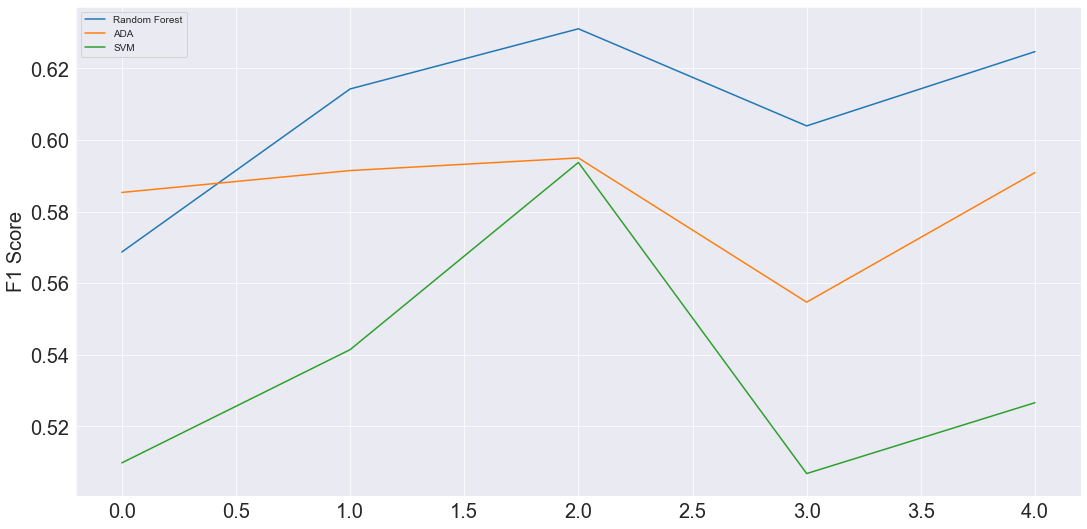

In [221]:
evaluationf1.plot(kind='line')
plt.ylabel('F1 Score',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

#### plot the smote

(array([0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
 <a list of 7 Text yticklabel objects>)

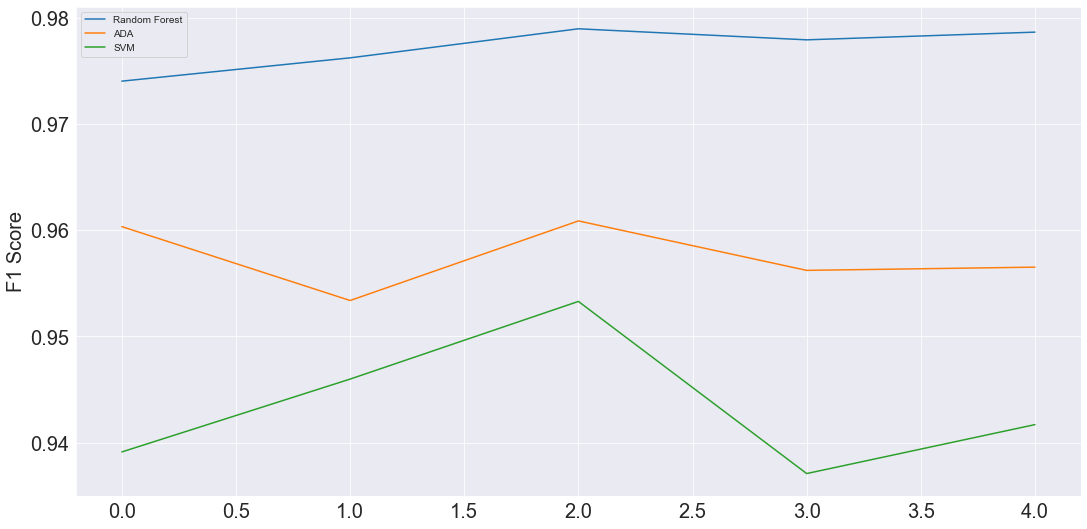

In [229]:
evaluationf1_smothe.plot(kind='line')
plt.ylabel('F1 Score',fontsize=20)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

## 6. Model Fitting

#### using non smothe

In [268]:
rfmodel= rf_pipe.fit(train_x,train_y)
adamodel= ada_pipe.fit(train_x,train_y)
svmmodel= svm_pipe.fit(train_x,train_y)

rf_prediction= rfmodel.predict(test_x)
ada_prediction= adamodel.predict(test_x)
svm_prediction = svmmodel.predict(test_x)

### using SMOTE Data

In [231]:
### random forest
rf_pipe.fit(train_x_smothe,train_y_smothe)
rf_prediction_smothe= rf_pipe.predict(test_x_smothe)

In [233]:
#### ADA
ada_pipe.fit(train_x_smothe,train_y_smothe)
ada_prediction_smothe= ada_pipe.predict(test_x_smothe)

In [235]:
#### Support Vector  Machine
svm_pipe.fit(train_x_smothe,train_y_smothe)
svm_prediction_smothe= svm_pipe.predict(test_x_smothe)

### 1)support vector Machine

#### with SMOTE

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      2131
           1       0.97      0.92      0.95      2119

    accuracy                           0.95      4250
   macro avg       0.95      0.95      0.95      4250
weighted avg       0.95      0.95      0.95      4250



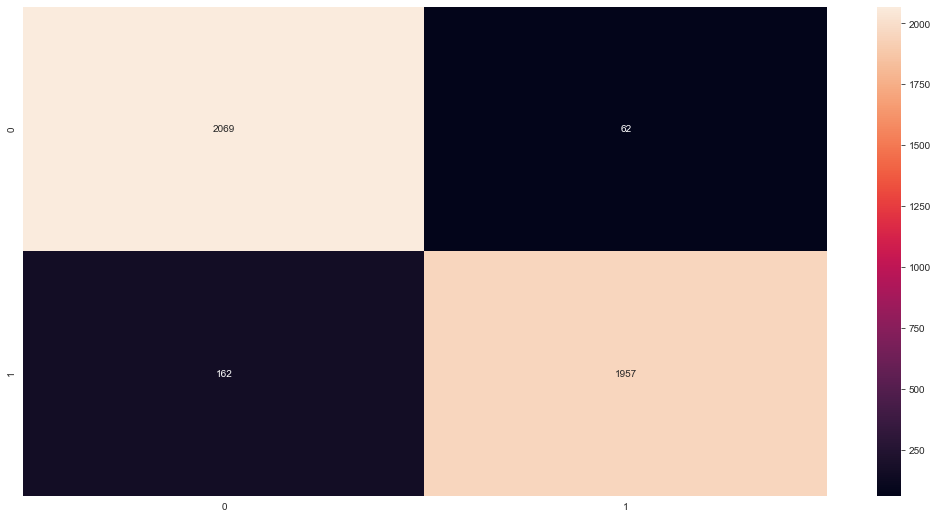

In [257]:
sns.heatmap(confusion_matrix(test_y_smothe,svm_prediction_smothe),fmt='d',annot=True)
print(classification_report(test_y_smothe,svm_prediction_smothe))

#### without SMOTE

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2113
           1       0.76      0.39      0.52       419

    accuracy                           0.88      2532
   macro avg       0.82      0.68      0.72      2532
weighted avg       0.87      0.88      0.86      2532



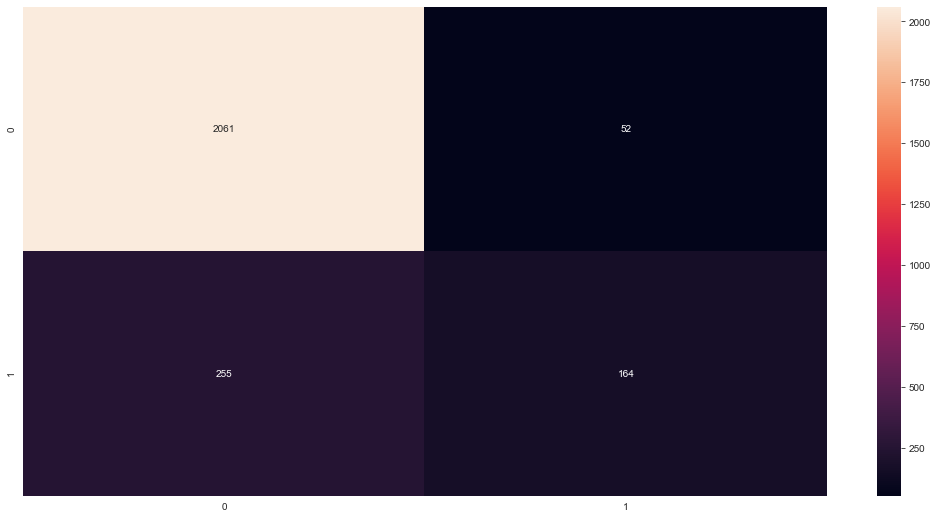

In [300]:
sns.heatmap(confusion_matrix(test_y,svm_prediction),fmt='d',annot=True)
print(classification_report(test_y,svm_prediction))

### 2)Random Forest

#### without SMOTE

              precision    recall  f1-score   support

           0       0.91      0.96      0.93      2113
           1       0.71      0.52      0.60       419

    accuracy                           0.89      2532
   macro avg       0.81      0.74      0.77      2532
weighted avg       0.88      0.89      0.88      2532



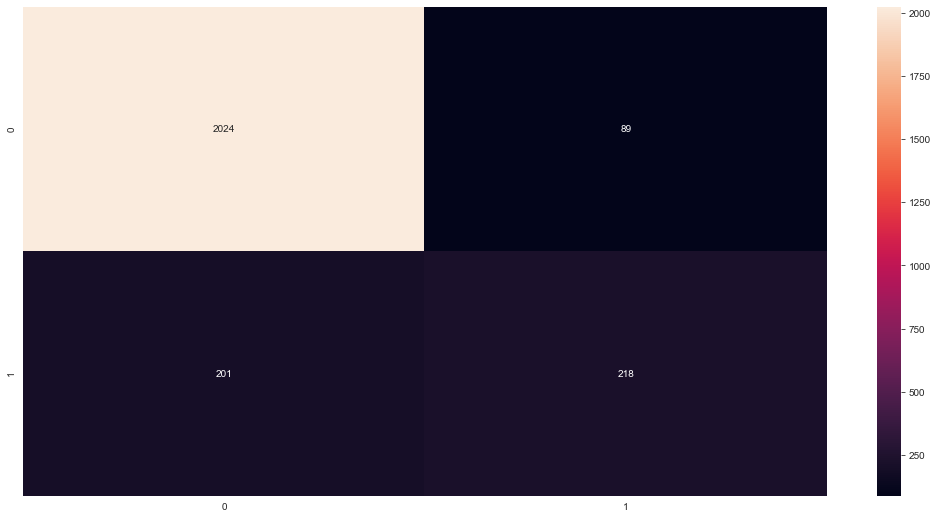

In [303]:
sns.heatmap(confusion_matrix(test_y,rf_prediction),fmt='d',annot=True)
print(classification_report(test_y,rf_prediction))

#### with SMOTE

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      2131
           1       0.97      0.99      0.98      2119

    accuracy                           0.98      4250
   macro avg       0.98      0.98      0.98      4250
weighted avg       0.98      0.98      0.98      4250



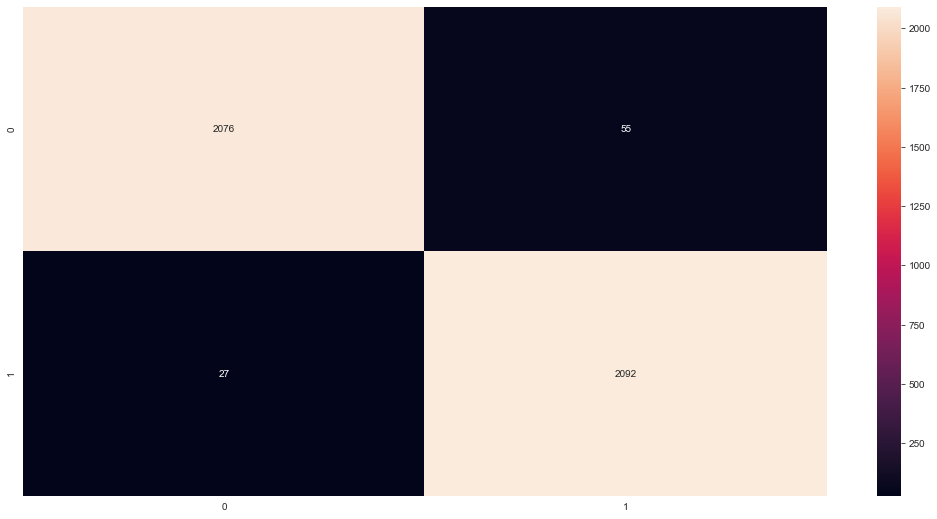

In [260]:
print(classification_report(test_y_smothe,rf_prediction_smothe))
sns.heatmap(confusion_matrix(test_y_smothe,rf_prediction_smothe),fmt='d',annot=True)

### 3) Ada Boost Model

#### without SMOTE

              precision    recall  f1-score   support

           0       0.89      0.98      0.93      2113
           1       0.76      0.39      0.52       419

    accuracy                           0.88      2532
   macro avg       0.82      0.68      0.72      2532
weighted avg       0.87      0.88      0.86      2532



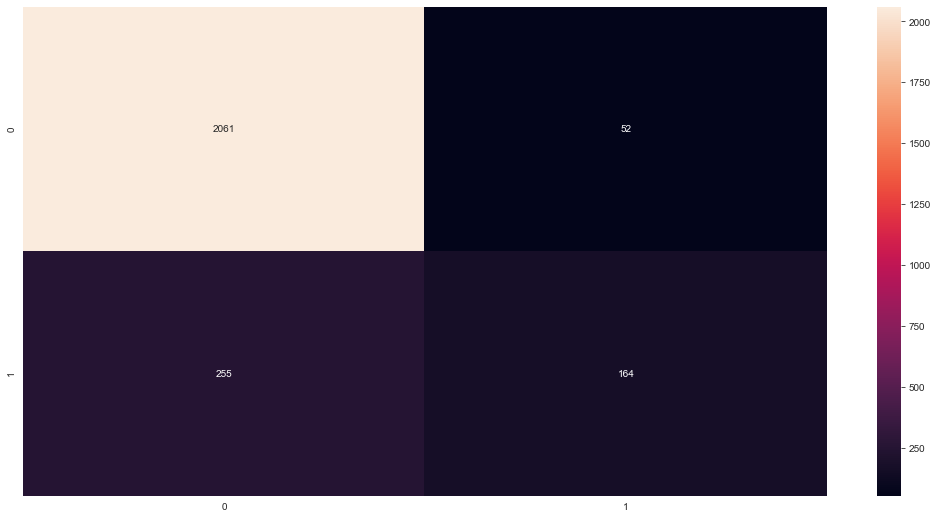

In [306]:
sns.heatmap(confusion_matrix(test_y,svm_prediction),fmt='d',annot=True)
print(classification_report(test_y,svm_prediction))

#### with SMOTE

              precision    recall  f1-score   support

           0       0.97      0.94      0.95      2131
           1       0.94      0.97      0.95      2119

    accuracy                           0.95      4250
   macro avg       0.95      0.95      0.95      4250
weighted avg       0.95      0.95      0.95      4250



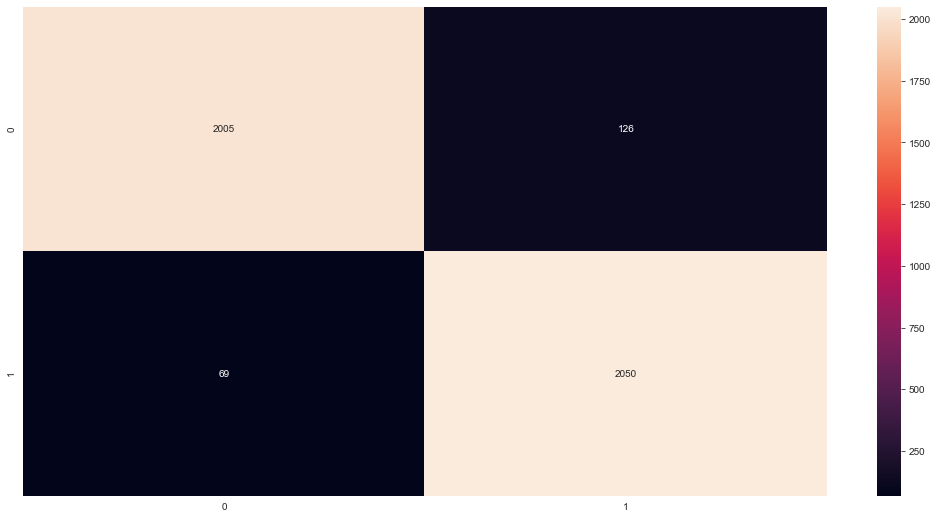

In [263]:
sns.heatmap(confusion_matrix(test_y_smothe,ada_prediction_smothe),fmt='d',annot=True)
print(classification_report(test_y_smothe,ada_prediction_smothe))

## Precision-Recal Curve Evaluation 

## 1) Random Forest

#### without SMOTE

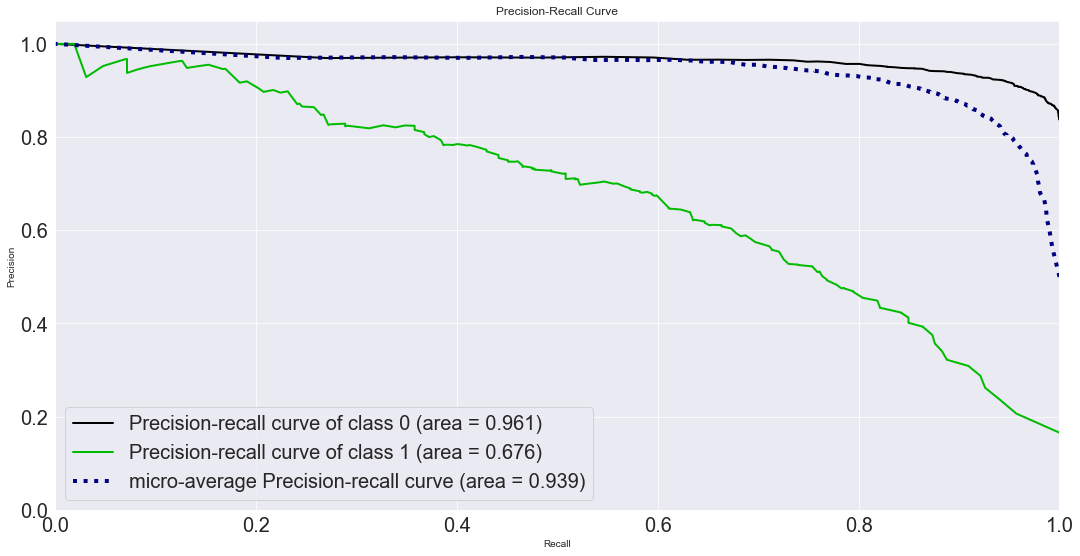

In [289]:
unsample_= rf_pipe.predict_proba(test_x)
skplt.metrics.plot_precision_recall(test_y,unsample_)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### with SMOTE

In [311]:
rf_pipe.fit(train_x_smothe,train_y_smothe)
## assign
rfproba_smote= rf_pipe.predict_proba(test_x_smothe)

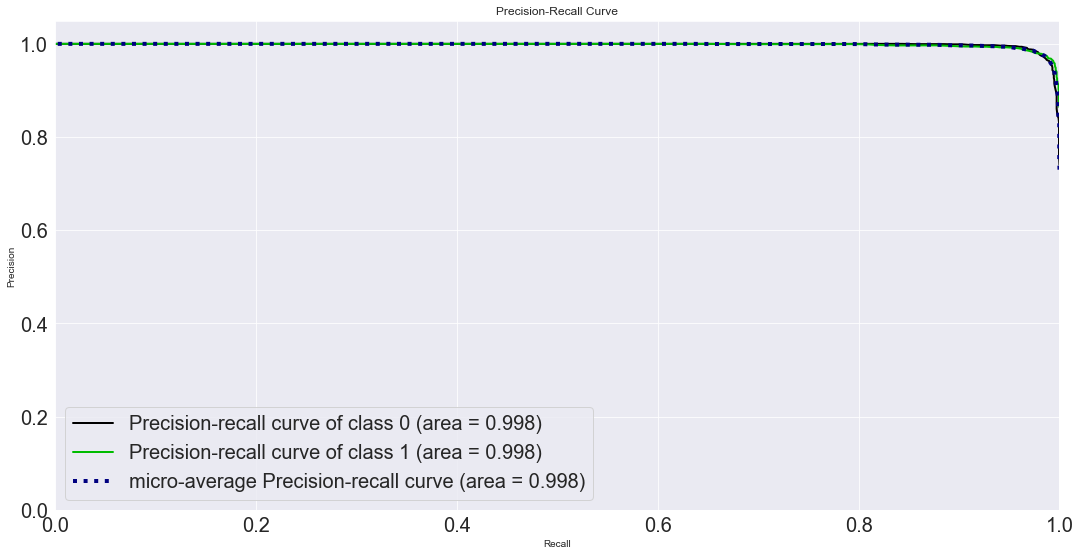

In [319]:
skplt.metrics.plot_precision_recall(test_y_smothe,rfproba_smote)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

### 2) ADA BOOSTER

#### without SMOTE

In [334]:
ada_pipe.fit(train_x,train_y)
adaproba= ada_pipe.predict_proba(test_x)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.



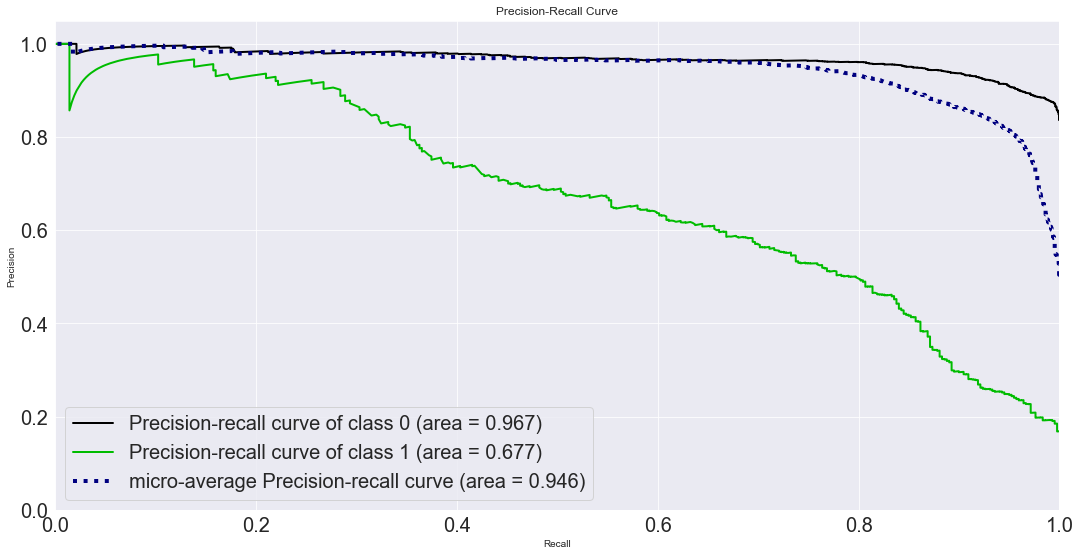

In [335]:
skplt.metrics.plot_precision_recall_curve(test_y,adaproba)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### with SMOTE

In [320]:
ada_pipe.fit(train_x_smothe,train_y_smothe)
## assign
adaproba_smote= ada_pipe.predict_proba(test_x_smothe)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.



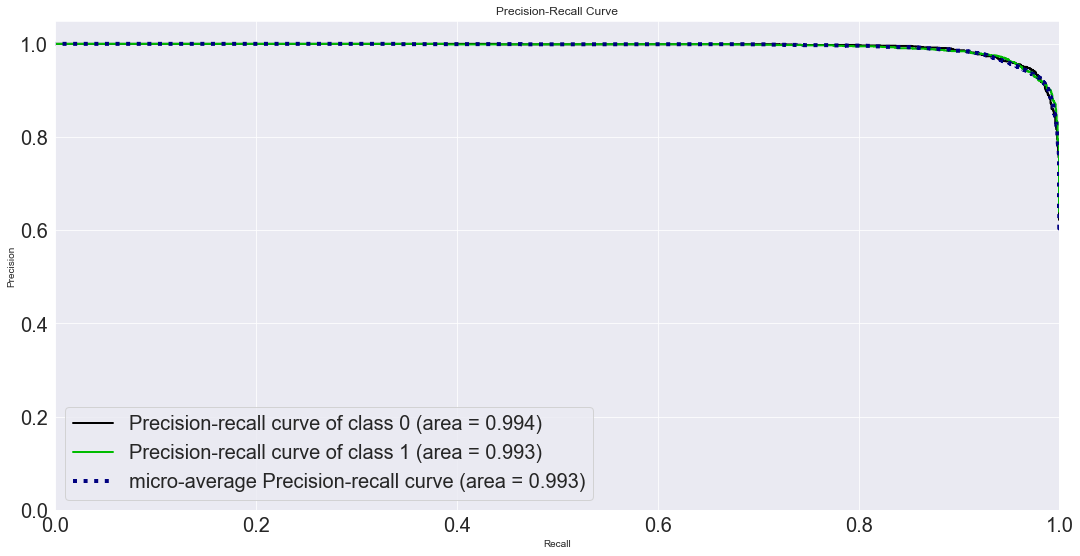

In [322]:
skplt.metrics.plot_precision_recall_curve(test_y_smothe,adaproba_smote)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## 3) Support Vector Machine

#### without SMOTE

In [329]:
svm_pipe.fit(train_x,train_y)
svmproba= svm_pipe.predict_proba(test_x)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.



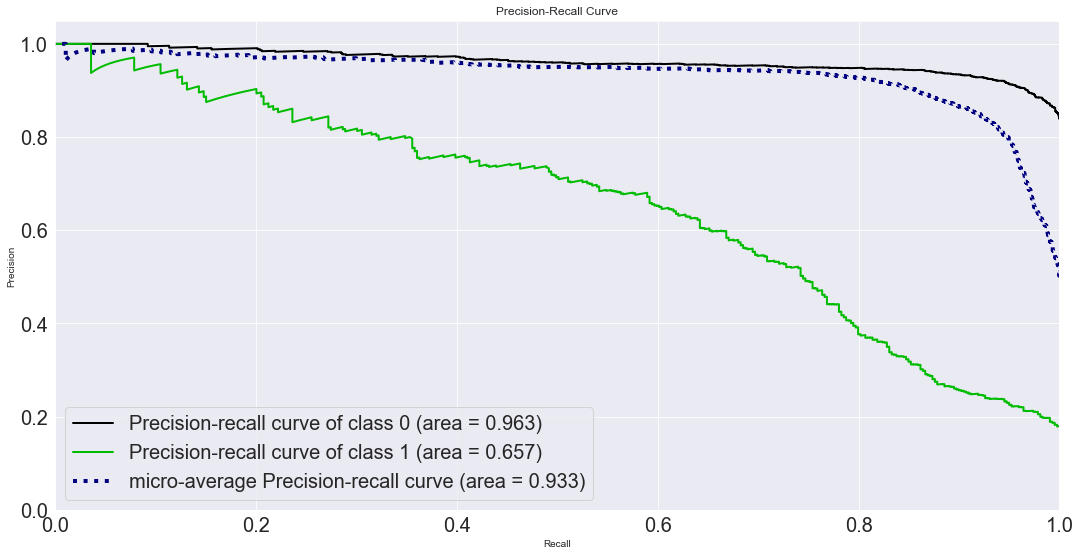

In [331]:
skplt.metrics.plot_precision_recall_curve(test_y,svmproba)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

#### with SMOTE

In [327]:
svm_pipe.fit(train_x_smothe,train_y_smothe)
svmproba_smote= svm_pipe.predict_proba(test_x_smothe)

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\sklearn\utils\deprecation.py:86: FutureWarning:

Function plot_precision_recall_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_precision_recall instead.



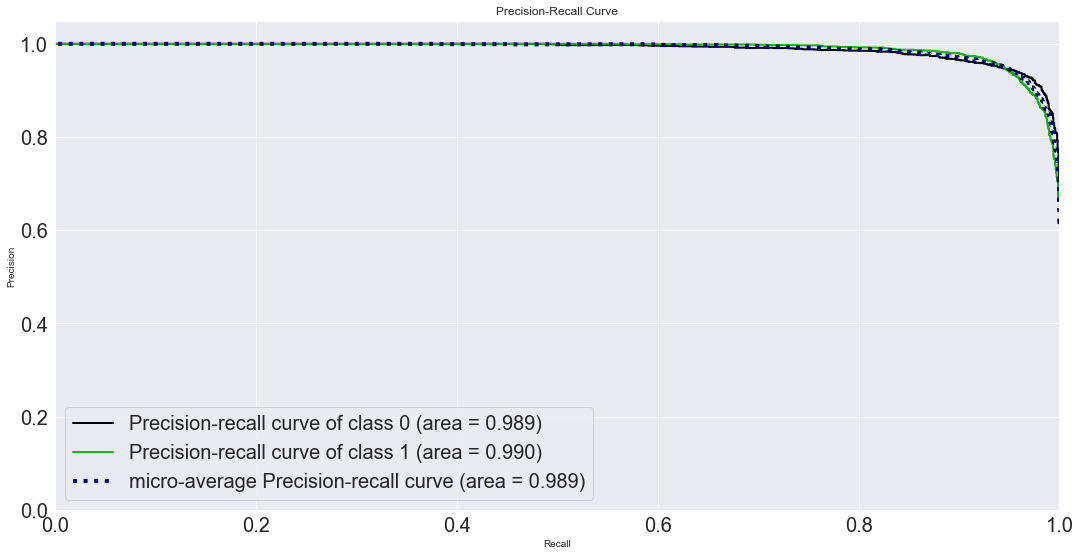

In [328]:
skplt.metrics.plot_precision_recall_curve(test_y_smothe,svmproba_smote)
plt.legend(prop={'size':20})
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.show()

## Predict Probability of each User ID

In [297]:
b_data.head()

CLIENTNUM     Attrition_Flag  Customer_Age Gender  Dependent_count  \
0  768805383  Existing Customer            45      M                3   
1  818770008  Existing Customer            49      F                5   
2  713982108  Existing Customer            51      M                3   
3  769911858  Existing Customer            40      F                4   
4  709106358  Existing Customer            40      M                3   

  Education_Level Marital_Status Income_Category Card_Category  \
0     High School        Married     $60K - $80K          Blue   
1        Graduate         Single  Less than $40K          Blue   
2        Graduate        Married    $80K - $120K          Blue   
3     High School        Unknown  Less than $40K          Blue   
4      Uneducated        Married     $60K - $80K          Blue   

   Months_on_book  ...  Credit_Limit  Total_Revolving_Bal  Avg_Open_To_Buy  \
0              39  ...       12691.0                  777          11914.0   
1              44  ...        8256.0                  864           7392.0   
2              36  ...        3418.0                    0           3418.0   
3              34  ...        3313.0                 2517            796.0   
4              21  ...        4716.0                    0           4716.0   

   Total_Amt_Chng_Q4_Q1  Total_Trans_Amt  Total_Trans_Ct  Total_Ct_Chng_Q4_Q1  \
0                 1.335             1144              42                1.625   
1                 1.541             1291              33                3.714   
2                 2.594             1887              20                2.333   
3                 1.405             1171              20                2.333   
4                 2.175              816              28                2.500   

   Avg_Utilization_Ratio  \
0                  0.061   
1                  0.105   
2                  0.000   
3                  0.760   
4                  0.000   

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1  \
0                                           0.000093                                                                                    
1                                           0.000057                                                                                    
2                                           0.000021                                                                                    
3                                           0.000134                                                                                    
4                                           0.000022                                                                                    

   Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2  
0                                            0.99991                                                                                   
1                                            0.99994                                                                                   
2                                            0.99998                                                                                   
3                                            0.99987                                                                                   
4                                            0.99998                                                                                   

[5 rows x 23 columns]

In [397]:
customer_to_join= b_data[['CLIENTNUM','Attrition_Flag']].reset_index()

#### predict proba 

we predict proba of '0' or '1' then merge it with the main Data based on the Index

In [337]:
len(ada_pipe.fit(train_x_smothe,train_y_smothe).predict_proba(test_x_smothe))

4250

In [343]:
ada_pipe.fit

Customer_Age  Gender  Dependent_count  Months_on_book  \
15927            42       0                2              37   
5613             50       1                1              36   
5767             48       1                4              43   
16223            45       1                3              39   
9708             36       1                2              36   
...             ...     ...              ...             ...   
11284            47       1                2              36   
11964            51       0                2              45   
5390             42       1                4              32   
860              40       0                3              28   
15795            44       1                3              35   

       Total_Relationship_Count  Months_Inactive_12_mon  \
15927                         3                       3   
5613                          3                       1   
5767                          4                       1   
16223                         2                       2   
9708                          2                       3   
...                         ...                     ...   
11284                         4                       2   
11964                         4                       3   
5390                          3                       1   
860                           4                       1   
15795                         2                       2   

       Contacts_Count_12_mon  Credit_Limit  Total_Revolving_Bal  \
15927                      3   2311.643303                    0   
5613                       2   4143.000000                 1888   
5767                       3   2357.000000                 1462   
16223                      2   2942.085905                 2433   
9708                       3   6071.000000                    0   
...                      ...           ...                  ...   
11284                      2   4084.780766                 2517   
11964                      2   4110.286903                 1757   
5390                       2   2314.000000                 1547   
860                        1   3563.000000                 1707   
15795                      3   2429.286231                  896   

       Avg_Open_To_Buy  ...  Married  Single  $120K +  $40K - $60K  \
15927      2311.643303  ...        1       0        0            0   
5613       2255.000000  ...        1       0        0            0   
5767        895.000000  ...        0       0        0            0   
16223       508.248971  ...        0       0        0            0   
9708       6071.000000  ...        0       1        0            0   
...                ...  ...      ...     ...      ...          ...   
11284      1567.780766  ...        0       0        0            0   
11964      2352.814653  ...        1       0        0            0   
5390        767.000000  ...        0       0        0            0   
860        1856.000000  ...        0       1        0            1   
15795      1532.732273  ...        0       0        0            0   

       $60K - $80K  $80K - $120K  Less than $40K  Blue  Gold  Silver  
15927            0             0               0     1     0       0  
5613             0             0               1     1     0       0  
5767             0             0               1     1     0       0  
16223            0             0               1     1     0       0  
9708             0             0               1     1     0       0  
...            ...           ...             ...   ...   ...     ...  
11284            0             0               0     1     0       0  
11964            0             0               0     1     0       0  
5390             0             0               1     1     0       0  
860              0             0               0     1     0       0  
15795            0             0               1     1     0       0  

[12750 rows x 32 columns]

In [345]:
toget_data= pd.concat([train_x_smothe,test_x_smothe])['Customer_Age']

### joining the Proba from Train and Test

### from Train data

In [353]:
proba_ada_smothe_train= ada_pipe.predict_proba(train_x_smothe)
proba_ada_smothe_test= ada_pipe.predict_proba(test_x_smothe)

In [374]:
proba_ada_smothe_train

array([[0.46460672, 0.53539328],
       [0.54655007, 0.45344993],
       [0.55201511, 0.44798489],
       ...,
       [0.54406706, 0.45593294],
       [0.50557375, 0.49442625],
       [0.47258458, 0.52741542]])

#### merging the CUSTOMER ID with the churnmodel

In [399]:
churn_a= pd.DataFrame(proba_ada_smothe_train[:,0],columns=['probability_A'])
churn_b= pd.DataFrame(proba_ada_smothe_test[:,0],columns=['probability_A'])
mergechurn= pd.concat([churn_a,churn_b]).reset_index().sort_values('index')

finaldatachurn = pd.merge(mergechurn,customer_to_join,on='index')

In [408]:
finaldatachurn= finaldatachurn.drop_duplicates('CLIENTNUM')
finaldatachurn['Attrition_Flag']= finaldatachurn['Attrition_Flag'].replace('Existing Customer','0').replace('Attrited Customer','1')

In [415]:
finaldatachurn.drop('index',axis=1)

probability_A  CLIENTNUM Attrition_Flag
0           0.464607  768805383              0
2           0.541085  818770008              0
4           0.552015  713982108              0
6           0.470578  769911858              0
8           0.436183  709106358              0
...              ...        ...            ...
14372       0.542130  772366833              0
14373       0.519669  710638233              1
14374       0.518599  716506083              1
14375       0.450035  717406983              1
14376       0.510340  714337233              1

[10127 rows x 3 columns]

In [351]:
print(len(train_x_smothe))
print(len(test_x_smothe))


12750
4250


In [375]:
b

10127